In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

covid = pd.read_csv('/content/sample_data/data_covid.csv')
penduduk = pd.read_csv('/content/sample_data/jumlahPenduduk.csv')
kepadatan = pd.read_csv('/content/sample_data/kepadatanPenduduk.csv')

In [54]:
covid.info()
covid.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8657 entries, 0 to 8656
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Object_ID                        8622 non-null   float64
 1   Provinsi                         8622 non-null   object 
 2   Tanggal                          8657 non-null   object 
 3   Kasus_Terkonfirmasi_Akumulatif   8622 non-null   float64
 4   Penambahan_Harian_Kasus_Terkonf  8622 non-null   float64
 5   Kasus_Sembuh_Akumulatif          8622 non-null   float64
 6   Penambahan_Harian_Kasus_Sembuh   8622 non-null   float64
 7   Kasus_Meninggal_Akumulatif       8622 non-null   float64
 8   Penambahan_Harian_Kasus_Meningg  8622 non-null   float64
 9   Kasus_Aktif_Akumulatif           8622 non-null   float64
 10  CFR_Harian                       8622 non-null   object 
 11  RI_Harian                        8622 non-null   object 
 12  FID                 

,0
Object_ID,35
Provinsi,35
Tanggal,0
Kasus_Terkonfirmasi_Akumulatif,35
Penambahan_Harian_Kasus_Terkonf,35
Kasus_Sembuh_Akumulatif,35
Penambahan_Harian_Kasus_Sembuh,35
Kasus_Meninggal_Akumulatif,35
Penambahan_Harian_Kasus_Meningg,35
Kasus_Aktif_Akumulatif,35


In [55]:
penduduk.info()
penduduk.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provinsi  39 non-null     object
 1   2018(L)   39 non-null     object
 2   2019(L)   39 non-null     object
 3   2020(L)   39 non-null     object
 4   2018(P)   39 non-null     object
 5   2019(P)   39 non-null     object
 6   2020(P)   39 non-null     object
 7   2018(T)   39 non-null     object
 8   2019(T)   39 non-null     object
 9   2020(T)   39 non-null     object
dtypes: object(10)
memory usage: 3.2+ KB


,0
Provinsi,0
2018(L),0
2019(L),0
2020(L),0
2018(P),0
2019(P),0
2020(P),0
2018(T),0
2019(T),0
2020(T),0


In [56]:
kepadatan.info()
kepadatan.isnull().sum()
kepadatan.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provinsi  38 non-null     object
 1   2016      38 non-null     object
 2   2019      38 non-null     object
 3   2020      38 non-null     object
dtypes: object(4)
memory usage: 1.3+ KB


,Provinsi,2016,2019,2020
0,ACEH,88,93,91
1,SUMATERA UTARA,193,200,203
2,SUMATERA BARAT,125,130,132
3,RIAU,75,80,73
4,JAMBI,69,72,71


In [57]:
covid = covid[covid['Provinsi'] != 'Indonesia']
covid = covid.drop(['Object_ID', 'FID', 'ObjectId'], axis=1)

# handling missing value
covid = covid.replace('#DIV/0!', np.nan)
covid = covid.fillna(0.0) # Mengganti NaN dengan 0.0
covid = covid.dropna(subset=['Tanggal'])

# Filter Tanggal
covid['Tanggal'] = pd.to_datetime(covid['Tanggal'])
start_date = '2020-03-02'
end_date = '2020-11-13'
covid = covid[(covid['Tanggal'] >= start_date) & (covid['Tanggal'] <= end_date)]

print("\n--- Data COVID-19 Setelah Filter Tanggal ---")
print(covid.head())
print(covid.tail())


--- Data COVID-19 Setelah Filter Tanggal ---
                    Provinsi                   Tanggal  \
0                       Aceh 2020-03-02 00:00:00+00:00   
1                       Bali 2020-03-02 00:00:00+00:00   
2                     Banten 2020-03-02 00:00:00+00:00   
3  Kepulauan Bangka Belitung 2020-03-02 00:00:00+00:00   
4                   Bengkulu 2020-03-02 00:00:00+00:00   

   Kasus_Terkonfirmasi_Akumulatif  Penambahan_Harian_Kasus_Terkonf  \
0                             0.0                              0.0   
1                             0.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   

   Kasus_Sembuh_Akumulatif  Penambahan_Harian_Kasus_Sembuh  \
0                      0.0                             0.0   
1                      0.0                             0.0  

In [58]:
covid_agg = covid.groupby('Provinsi').last().reset_index()

print("\n--- Data COVID-19 Setelah Agregasi ---")
print(covid_agg.head())
print(covid_agg.tail())


--- Data COVID-19 Setelah Agregasi ---
      Provinsi                   Tanggal  Kasus_Terkonfirmasi_Akumulatif  \
0         Aceh 2020-11-13 00:00:00+00:00                          7797.0   
1         Bali 2020-11-13 00:00:00+00:00                         12519.0   
2       Banten 2020-11-13 00:00:00+00:00                         10554.0   
3     Bengkulu 2020-11-13 00:00:00+00:00                          1294.0   
4  DKI Jakarta 2020-11-13 00:00:00+00:00                        115174.0   

   Penambahan_Harian_Kasus_Terkonf  Kasus_Sembuh_Akumulatif  \
0                           3254.0                   6258.0   
1                           8324.0                  11461.0   
2                           6268.0                   8141.0   
3                          -7015.0                    992.0   
4                          99155.0                 106100.0   

   Penambahan_Harian_Kasus_Sembuh  Kasus_Meninggal_Akumulatif  \
0                          3188.0                       282

In [59]:
# Preprocessing Data Penduduk & Kepadatan
penduduk_2020 = penduduk[['Provinsi', '2020(T)']].rename(columns={'2020(T)': 'Jumlah_Penduduk_2020'})
kepadatan_2020 = kepadatan[['Provinsi', '2020']].rename(columns={'2020': 'Kepadatan_Penduduk_2020'})

# Mengganti nilai '-' dengan NaN
penduduk_2020 = penduduk_2020.replace('-', np.nan)
kepadatan_2020 = kepadatan_2020.replace('-', np.nan)

# Standarisasi nama provinsi
covid_agg['Provinsi'] = covid_agg['Provinsi'].str.lower()
penduduk_2020['Provinsi'] = penduduk_2020['Provinsi'].str.lower()
kepadatan_2020['Provinsi'] = kepadatan_2020['Provinsi'].str.lower()


# Merge Data
data = pd.merge(covid_agg, penduduk_2020, on='Provinsi', how='left')
data = pd.merge(data, kepadatan_2020, on='Provinsi', how='left')


# Mengatasi provinsi baru dan yang tidak ada data penduduk/kepadatan
data.dropna(subset=['Jumlah_Penduduk_2020','Kepadatan_Penduduk_2020'], inplace=True)

print("\n--- Data Setelah Merge dengan Data Penduduk & Kepadatan ---")
print(data.head())


--- Data Setelah Merge dengan Data Penduduk & Kepadatan ---
      Provinsi                   Tanggal  Kasus_Terkonfirmasi_Akumulatif  \
0         aceh 2020-11-13 00:00:00+00:00                          7797.0   
1         bali 2020-11-13 00:00:00+00:00                         12519.0   
2       banten 2020-11-13 00:00:00+00:00                         10554.0   
3     bengkulu 2020-11-13 00:00:00+00:00                          1294.0   
4  dki jakarta 2020-11-13 00:00:00+00:00                        115174.0   

   Penambahan_Harian_Kasus_Terkonf  Kasus_Sembuh_Akumulatif  \
0                           3254.0                   6258.0   
1                           8324.0                  11461.0   
2                           6268.0                   8141.0   
3                          -7015.0                    992.0   
4                          99155.0                 106100.0   

   Penambahan_Harian_Kasus_Sembuh  Kasus_Meninggal_Akumulatif  \
0                          3188.0     

In [60]:
#  Pilih Fitur dan Normalisasi
features = ['Kasus_Terkonfirmasi_Akumulatif', 'Penambahan_Harian_Kasus_Terkonf', 'Kasus_Meninggal_Akumulatif', 'Jumlah_Penduduk_2020', 'Kepadatan_Penduduk_2020']
X = data[features]

# Konversi tipe data ke numerik
X['Jumlah_Penduduk_2020'] = pd.to_numeric(X['Jumlah_Penduduk_2020'])
X['Kepadatan_Penduduk_2020'] = pd.to_numeric(X['Kepadatan_Penduduk_2020'])

print("\n--- Fitur yang digunakan ---")
print(X.head())
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("\n--- Data Fitur Setelah Scaling ---")
print(X_scaled[:5,:])


--- Fitur yang digunakan ---
   Kasus_Terkonfirmasi_Akumulatif  Penambahan_Harian_Kasus_Terkonf  \
0                          7797.0                           3254.0   
1                         12519.0                           8324.0   
2                         10554.0                           6268.0   
3                          1294.0                          -7015.0   
4                        115174.0                          99155.0   

   Kasus_Meninggal_Akumulatif  Jumlah_Penduduk_2020  Kepadatan_Penduduk_2020  
0                       282.0                5388.1                       91  
1                       403.0                4414.4                      747  
2                       298.0               12895.3                     1232  
3                        59.0                1994.3                      101  
4                      2412.0               10576.4                    15907  

--- Data Fitur Setelah Scaling ---
[[0.06113545 0.15422267 0.06845163 0.09

<ipython-input-60-9c456d078446>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Jumlah_Penduduk_2020'] = pd.to_numeric(X['Jumlah_Penduduk_2020'])
<ipython-input-60-9c456d078446>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Kepadatan_Penduduk_2020'] = pd.to_numeric(X['Kepadatan_Penduduk_2020'])


In [61]:
# Clustering dengan K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analisis Centroid
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("\n--- Centroid Cluster ---")
print(centroids)


--- Centroid Cluster ---
   Kasus_Terkonfirmasi_Akumulatif  Penambahan_Harian_Kasus_Terkonf  \
0                     2863.437500                     -2964.625000   
1                    45978.333333                     34860.666667   
2                   115174.000000                     99155.000000   
3                    13050.090909                      6931.363636   

   Kasus_Meninggal_Akumulatif  Jumlah_Penduduk_2020  Kepadatan_Penduduk_2020  
0                   79.625000           3016.256250                92.187500  
1                 2227.666667          41419.766667              1109.666667  
2                 2412.000000          10576.400000             15907.000000  
3                  393.636364           7164.463636               264.636364  


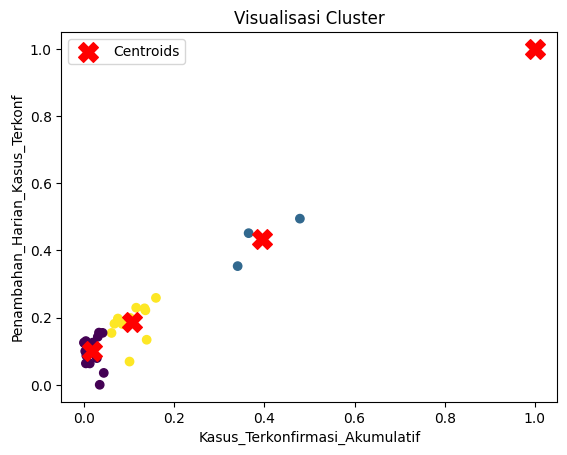


--- Data dengan Cluster ---
               Provinsi  Cluster
0                  aceh        3
1                  bali        3
2                banten        3
3              bengkulu        0
4           dki jakarta        2
6             gorontalo        0
7                 jambi        0
8            jawa barat        1
9           jawa tengah        1
10           jawa timur        1
11     kalimantan barat        0
12   kalimantan selatan        3
13    kalimantan tengah        0
14     kalimantan timur        3
15     kalimantan utara        0
18              lampung        0
19               maluku        0
20         maluku utara        0
21  nusa tenggara barat        0
22  nusa tenggara timur        0
23                papua        3
24          papua barat        0
25                 riau        3
26       sulawesi barat        0
27     sulawesi selatan        3
28      sulawesi tengah        0
29    sulawesi tenggara        0
30       sulawesi utara        0
31       sumat

In [62]:
# Visualisasi
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Visualisasi Cluster')
plt.legend()
plt.show()

print("\n--- Data dengan Cluster ---")
print(data[['Provinsi','Cluster']])